In [16]:

import pandas as pd
import numpy as np
df = pd.read_csv('PCOS_extended_dataset.csv')
for col in df.columns:
    df[col] = pd.to_numeric(df[col], errors='coerce')

print("Missing values after cleaning:")
print(df.isnull().sum().sum())

df.dropna(inplace=True)

print(f"Cleaned Dataset Shape: {df.shape}")
df.head()

Missing values after cleaning:
11
Cleaned Dataset Shape: (1989, 44)


,Sl. No,Patient File No.,PCOS (Y/N),Age (yrs),Weight (Kg),Height(Cm),BMI,Blood Group,Pulse rate(bpm),RR (breaths/min),...,Pimples(Y/N),Fast food (Y/N),Reg.Exercise(Y/N),BP _Systolic (mmHg),BP _Diastolic (mmHg),Follicle No. (L),Follicle No. (R),Avg. F size (L) (mm),Avg. F size (R) (mm),Endometrium (mm)
0,193,193,0,30,69.979147,167.708055,23.185569,12,72,22,...,1,0.0,1,105.483401,76.096379,2,4,10.0,13.0,6.176029
1,360,360,0,36,63.711688,154.055877,25.441392,13,70,18,...,1,0.0,1,115.883740,79.117243,2,3,13.0,11.0,6.824718
2,10,10,0,36,51.848631,149.059804,23.928264,15,80,20,...,0,0.0,0,112.219711,80.919417,1,1,14.0,17.0,2.568691
3,278,278,1,29,66.893988,148.628036,27.894935,15,72,18,...,0,0.0,1,104.619624,69.902681,1,1,12.0,14.0,9.962732
4,71,71,0,33,52.536198,150.767409,23.079564,13,72,18,...,0,0.0,0,99.175454,70.330461,5,2,11.5,4.7,6.655190


Missing values per column:
 Sl. No                    0
Patient File No.          0
PCOS (Y/N)                0
 Age (yrs)                0
Weight (Kg)               0
Height(Cm)                0
BMI                       0
Blood Group               0
Pulse rate(bpm)           0
RR (breaths/min)          0
Hb(g/dl)                  0
Cycle(R/I)                0
Cycle length(days)        0
Marraige Status (Yrs)     0
Pregnant(Y/N)             0
No. of abortions          0
  I   beta-HCG(mIU/mL)    0
II    beta-HCG(mIU/mL)    0
FSH(mIU/mL)               0
LH(mIU/mL)                0
FSH/LH                    0
Hip(inch)                 0
Waist(inch)               0
Waist:Hip Ratio           0
TSH (mIU/L)               0
AMH(ng/mL)                0
PRL(ng/mL)                0
Vit D3 (ng/mL)            0
PRG(ng/mL)                0
RBS(mg/dl)                0
Weight gain(Y/N)          0
hair growth(Y/N)          0
Skin darkening (Y/N)      0
Hair loss(Y/N)            0
Pimples(Y/N)        

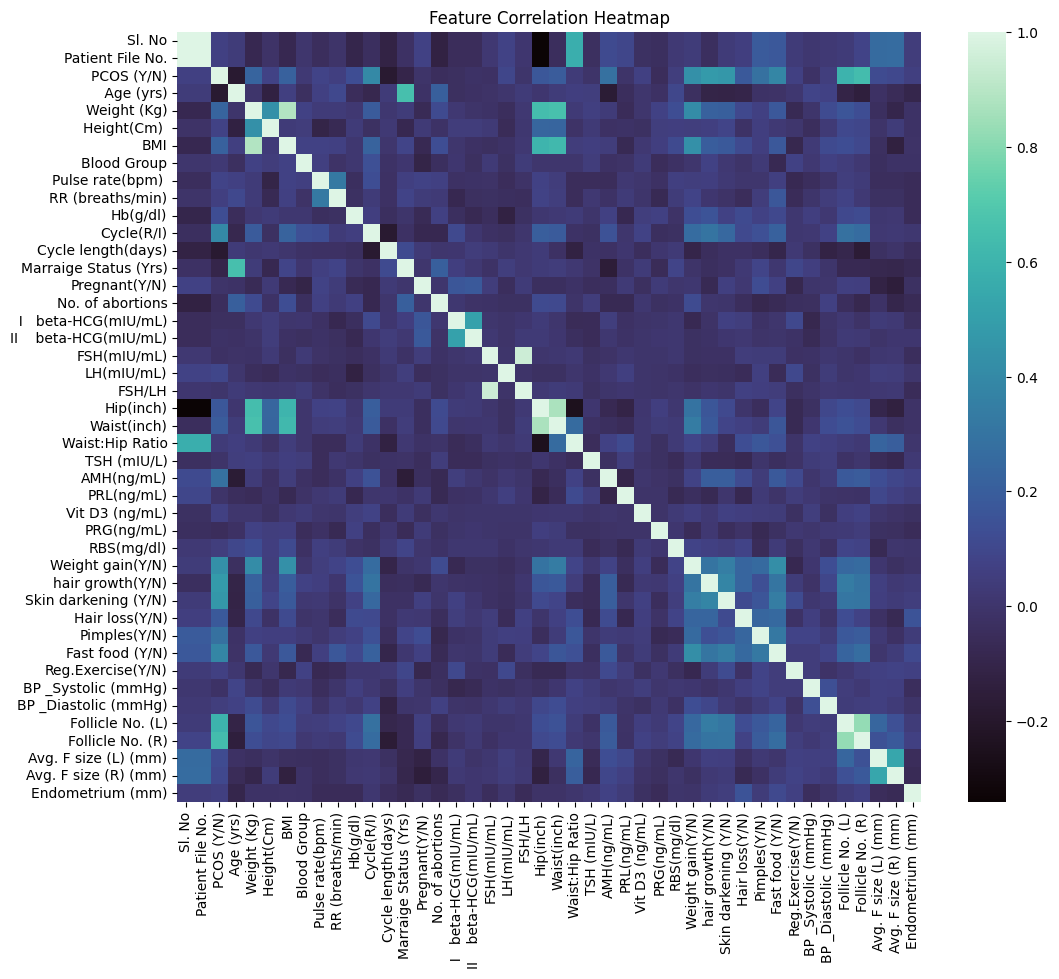

In [17]:

print("Missing values per column:\n", df.isnull().sum())
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(), annot=False, cmap='mako')
plt.title("Feature Correlation Heatmap")
plt.show()

In [21]:

X = df.drop('PCOS (Y/N)', axis=1)
y = df['PCOS (Y/N)']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

print("Data successfully split and scaled.")

Data successfully split and scaled.


In [22]:

model = RandomForestClassifier(n_estimators=100, random_state=42)


model.fit(X_train, y_train)

print("Model training complete.")

Model training complete.


In [ ]:

y_pred = model.predict(X_test)

print("--- Confusion Matrix ---")
print(confusion_matrix(y_test, y_pred))
print("\n--- Classification Report ---")
print(classification_report(y_test, y_pred))
print(f"\nOverall Accuracy: {accuracy_score(y_test, y_pred)*100:.2f}%")

--- Confusion Matrix ---
[[255   0]
 [  4 139]]

--- Classification Report ---
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       255
           1       1.00      0.97      0.99       143

    accuracy                           0.99       398
   macro avg       0.99      0.99      0.99       398
weighted avg       0.99      0.99      0.99       398


Overall Accuracy: 98.99%


In [ ]:
import joblib

joblib.dump(model, 'pcos_random_forest.pkl')

joblib.dump(scaler, 'pcos_scaler.pkl')

print("Model and Scaler saved successfully!")

Model and Scaler saved successfully!


In [ ]:

import numpy as np
import joblib


loaded_model = joblib.load('pcos_random_forest.pkl')
loaded_scaler = joblib.load('pcos_scaler.pkl')

sample_patient = X.iloc[0:1].values 
scaled_data = loaded_scaler.transform(sample_patient)
prediction = loaded_model.predict(scaled_data)

print(f"Prediction for sample patient: {'PCOS Positive' if prediction[0] == 1 else 'PCOS Negative'}")

Prediction for sample patient: PCOS Negative


c:\Users\JAISSY.V\AppData\Local\Programs\Python\Python314\Lib\site-packages\sklearn\utils\validation.py:2691: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
